In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from IPython.display import display, HTML

df=pd.read_csv("G:\ITMD 525 Assignments\ITMD_525_HW5_Twinkle\JobsClassification.csv")
df.head(10)

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
5,6,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3,PG02
6,7,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3,PG03
7,8,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5,PG04
8,9,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7,PG05
9,10,3,Baker,10,Baker I,4,2,0,1,4,1,1,2,PG04


In [9]:
df.isnull().sum()

ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

In [10]:
df=df.drop('ID',1)
df=df.drop('PG',1)
display(HTML(df.head(10).to_html()))

,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
0,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5
1,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7
2,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10
3,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11
4,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1
5,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3
6,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3
7,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5
8,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7
9,3,Baker,10,Baker I,4,2,0,1,4,1,1,2


In [11]:
df_raw=df.copy(deep=True) 
df=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df[['JobFamilyDescription','JobClassDescription']])
# add them to dataframe
df=df.join(df_dummies)
# drop original columns
df=df.drop('JobFamilyDescription',axis=1)
df=df.drop('JobClassDescription', axis=1)

display('Data Example:',HTML(df.head(10).to_html()))

'Data Example:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,1,1,5,3,1,3,3,4,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,6,4,1,5,4,5,7,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,8,4,2,6,5,6,7,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,10,5,5,6,6,7,8,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,5,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,6,2,1,1,1,1,1,2,3,0,1,0,0,0,0,0,0,0,

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())

Selected numerical columns:
 ['JobFamily', 'JobClass', 'PayGrade', 'EducationLevel', 'Experience', 'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel', 'FinancialBudget']


In [13]:
df

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,...,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,0.000000,0.000000,0.444444,0.4,0.1,0.4,0.4,0.500000,0.285714,0.4,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.015385,0.555556,0.6,0.1,0.8,0.6,0.666667,0.857143,0.6,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.030769,0.777778,0.6,0.2,1.0,0.8,0.833333,0.857143,0.9,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.046154,1.000000,0.8,0.5,1.0,1.0,1.000000,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.071429,0.061538,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.000000,0.938462,0.222222,0.0,0.1,0.0,0.2,0.000000,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,0
62,1.000000,0.953846,0.444444,0.6,0.1,0.4,0.4,0.500000,0.285714,0.3,...,0,0,0,0,0,0,1,0,0,0
63,1.000000,0.969231,0.555556,0.8,0.2,0.6,0.6,0.666667,0.857143,0.4,...,0,0,0,0,0,0,0,1,0,0
64,1.000000,0.984615,0.777778,0.8,0.5,1.0,0.8,0.833333,0.857143,0.6,...,0,0,0,0,0,0,0,0,1,0


In [15]:
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


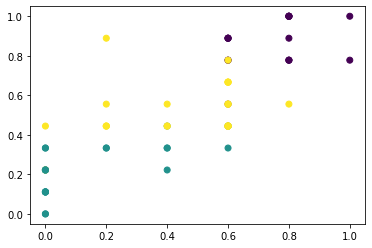

In [20]:
kmeans=KMeans(n_clusters=3, random_state=1)
kmeans.fit(df)
y_pred=kmeans.predict(df)

plt.scatter(df['EducationLevel'],df['PayGrade'],c=y_pred,cmap='viridis')

'Data:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V,Cluster
56,0.857143,0.861538,0.222222,0.0,0.2,0.4,0.2,0.000000,0.142857,0.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
57,0.857143,0.876923,0.444444,0.2,0.3,0.4,0.4,0.500000,0.285714,0.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
58,0.928571,0.892308,0.333333,0.4,0.0,0.0,0.2,0.000000,0.285714,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
59,0.928571,0.907692,0.444444,0.4,0.0,0.4,0.4,0.000000,0.857143,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
60,0.928571,0.923077,0.7777

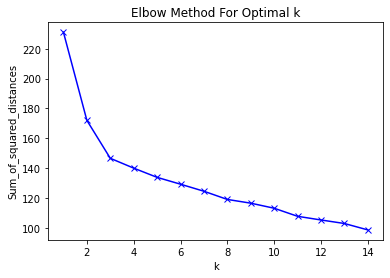

In [23]:
opt=kmeans.labels_
df['Cluster']=opt
display('Data:',HTML(df.tail(10).to_html()))
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot K and SSE, observe which one is better
# In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

'Data after clustering:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V,Cluster
56,0.857143,0.861538,0.222222,0.0,0.2,0.4,0.2,0.000000,0.142857,0.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1
57,0.857143,0.876923,0.444444,0.2,0.3,0.4,0.4,0.500000,0.285714,0.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
58,0.928571,0.892308,0.333333,0.4,0.0,0.0,0.2,0.000000,0.285714,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1
59,0.928571,0.907692,0.444444,0.4,0.0,0.4,0.4,0.000000,0.857143,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1
60,0.928571,0.923077,0.

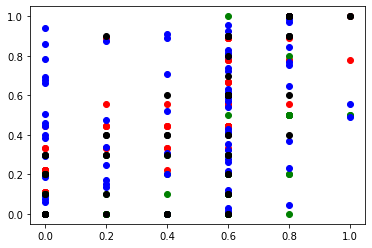

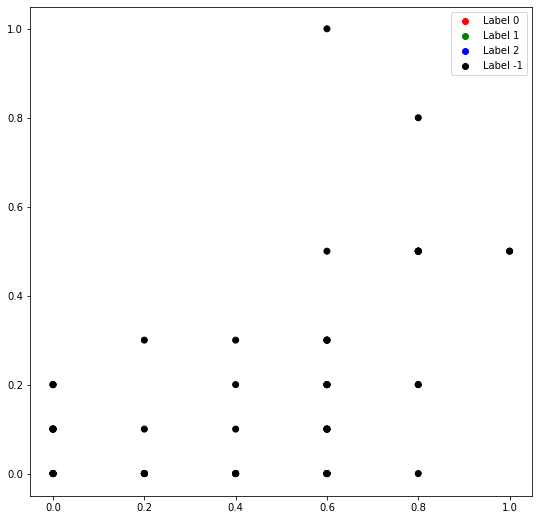

In [77]:
# 03. DBSCAN - Density-based Clustering

from sklearn.cluster import DBSCAN



# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.2, min_samples = 3).fit(df) 
labels = db_default.labels_ 
df['Cluster']=labels
display('Data after clustering:',HTML(df.tail(10).to_html()))

# Visualize the clusters

# Building the label to colour mapping 
# Need to figure out how many clusters were produced, then assign different number of the colors
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df['EducationLevel'], df['PayGrade'], color ='r'); 
g = plt.scatter(df['EducationLevel'], df['Experience'], color ='g'); 
b = plt.scatter(df['EducationLevel'], df['JobClass'], color ='b'); 
k = plt.scatter(df['EducationLevel'], df['FinancialBudget'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(df['EducationLevel'], df['Experience'], c = cvec)   
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))   
plt.show()

'Data:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V,Cluster
56,0.857143,0.861538,0.222222,0.0,0.2,0.4,0.2,0.000000,0.142857,0.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1
57,0.857143,0.876923,0.444444,0.2,0.3,0.4,0.4,0.500000,0.285714,0.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
58,0.928571,0.892308,0.333333,0.4,0.0,0.0,0.2,0.000000,0.285714,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1
59,0.928571,0.907692,0.444444,0.4,0.0,0.4,0.4,0.000000,0.857143,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1
60,0.928571,0.923077,0.

'Data after clustering:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V,Cluster
56,0.857143,0.861538,0.222222,0.0,0.2,0.4,0.2,0.000000,0.142857,0.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1
57,0.857143,0.876923,0.444444,0.2,0.3,0.4,0.4,0.500000,0.285714,0.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
58,0.928571,0.892308,0.333333,0.4,0.0,0.0,0.2,0.000000,0.285714,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1
59,0.928571,0.907692,0.444444,0.4,0.0,0.4,0.4,0.000000,0.857143,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1
60,0.928571,0.923077,0.

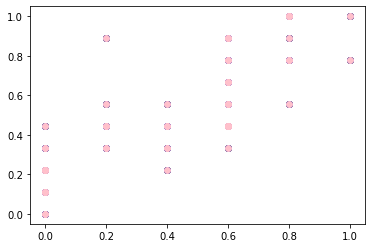

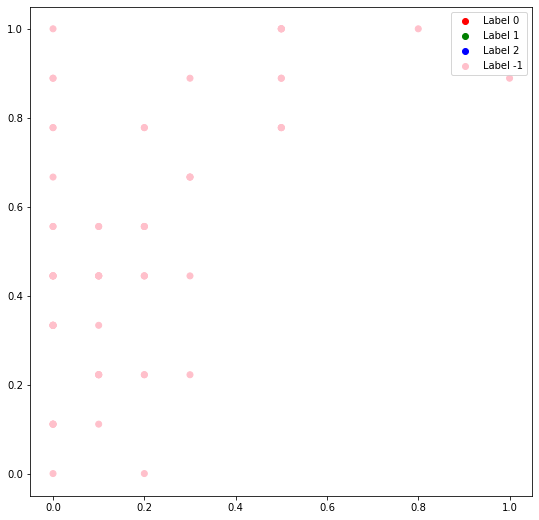

In [76]:
# 03. DBSCAN - Density-based Clustering

from sklearn.cluster import DBSCAN

# API: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
df_dbscan=df
display('Data:',HTML(df_dbscan.tail(10).to_html()))

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.3, min_samples = 4).fit(df_dbscan) 
labels = db_default.labels_ 
df_dbscan['Cluster']=labels
display('Data after clustering:',HTML(df_dbscan.tail(10).to_html()))

# Visualize the clusters

# Building the label to colour mapping 
# Need to figure out how many clusters were produced, then assign different number of the colors
colours = {} 
colours[0] = 'red'
colours[1] = 'green'
colours[2] = 'blue'
colours[-1] = 'pink'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df['EducationLevel'], df['PayGrade'], color ='red'); 
g = plt.scatter(df['EducationLevel'], df['PayGrade'], color ='green'); 
b = plt.scatter(df['EducationLevel'], df['PayGrade'], color ='blue'); 
k = plt.scatter(df['EducationLevel'], df['PayGrade'], color ='pink'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
 
plt.scatter(df['Experience'], df['PayGrade'], c =cvec); 

# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))   
plt.show()

'Data:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V,Cluster
56,0.857143,0.861538,0.222222,0.0,0.2,0.4,0.2,0.000000,0.142857,0.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1
57,0.857143,0.876923,0.444444,0.2,0.3,0.4,0.4,0.500000,0.285714,0.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
58,0.928571,0.892308,0.333333,0.4,0.0,0.0,0.2,0.000000,0.285714,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1
59,0.928571,0.907692,0.444444,0.4,0.0,0.4,0.4,0.000000,0.857143,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1
60,0.928571,0.923077,0.

[3 3 3 3 0 0 0 0 1 3 3 3 3 3 3 3 0 0 0 3 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


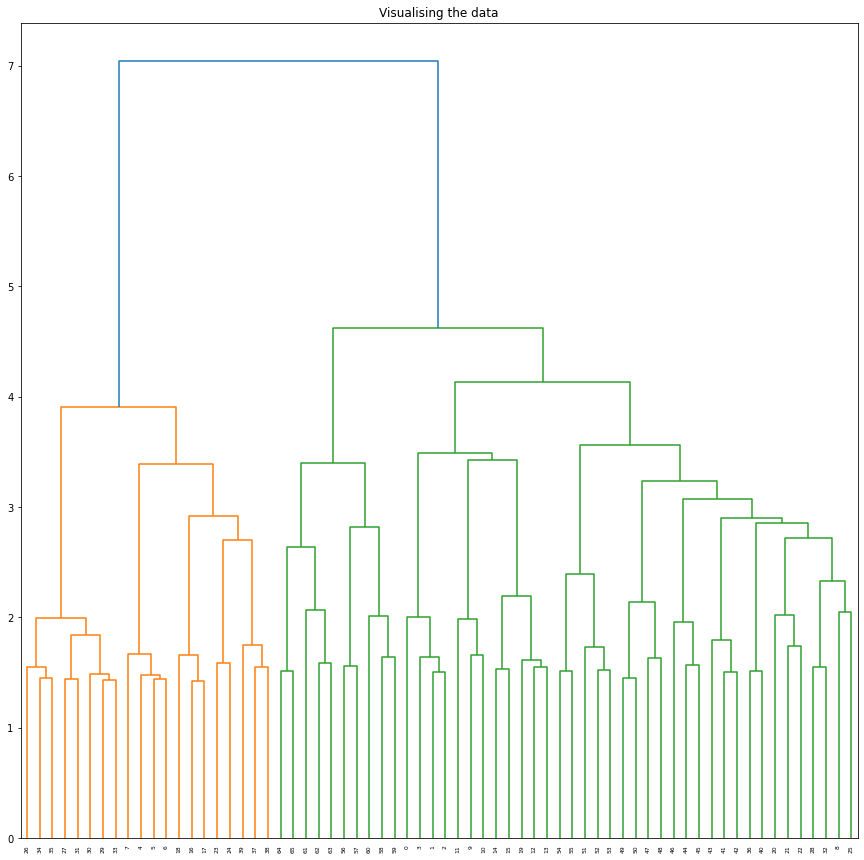

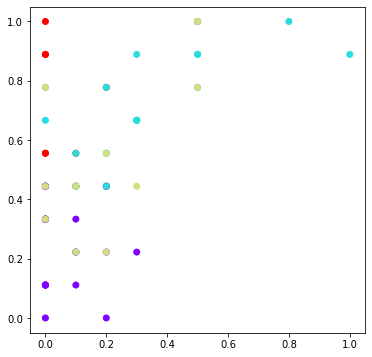

In [62]:
# 04. Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 



display('Data:',HTML(df.tail(10).to_html()))

# Plot Dendrogram
plt.figure(figsize =(15, 15)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(df, method ='ward'))) 

# Clustering based on the Dendrogram
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cls=cluster.fit_predict(df)
print(cluster.labels_)

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(df['Experience'], df['PayGrade'],  
           c = cls, cmap ='rainbow') 
plt.show()